In [111]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import numpy as np
from scipy.interpolate import interp1d
from datetime import datetime
import matplotlib.dates as mdates
import pytz
import calendar

In [112]:
city= input("Type a city to find AQI analysis: ").lower()

geo_url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city + "&appid=" + weather_api_key
lat_lon = requests.get(geo_url).json()


Type a city to find AQI analysis: Chicago


In [113]:
lat = str(lat_lon[0]["lat"])
lon = str(lat_lon[0]["lon"])

In [125]:
url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
units = "imperial"
start = input("Please enter a start date using EPOCH only: ")
end = input("Please enter an end date using EPOCH only: ")
print("--------------------------")
print("All set, working on that now.....")

final_url = url + "?lat=" + lat + "&lon=" + lon + "&start=" + start + "&end=" + end + "&appid=" + weather_api_key

Please enter a start date using EPOCH only: 1609545540
Please enter an end date using EPOCH only: 1638403140
--------------------------
All set, working on that now.....


'http://api.openweathermap.org/data/2.5/air_pollution/history?lat=41.8755616&lon=-87.6244212&start=1609545540&end=1638403140&appid=155db15cf89682a55503d94f25dc4deb'

In [127]:
aqi_num = requests.get(final_url).json()

In [129]:
aqi = []
time_stamp = []
ts = []

for day in range(len(aqi_num['list'])):
    aqi.append(aqi_num['list'][day]['main']['aqi'])
    time_stamp.append(aqi_num['list'][day]['dt'])
    
for time in time_stamp:
    ts.append(datetime.fromtimestamp(time).strftime("%m-%d-%Y"))

In [130]:
aqi_df = pd.DataFrame({
    "Human Time": ts,
    "AQI": aqi
})

total_count = aqi_df["AQI"].count()


aqi_df["Human Time"] = pd.to_datetime(aqi_df["Human Time"], format="%m-%d-%Y")

aqi_groups = aqi_df.resample('D', on='Human Time').max()


In [131]:
aqi_df["year"] = pd.DatetimeIndex(aqi_df["Human Time"]).year
year = (aqi_df["year"][0])
year

2021

--------------------------
A bar graph has been created with your AQI data


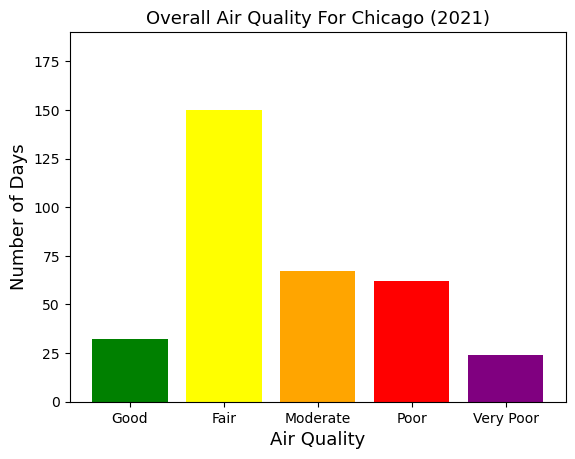

In [132]:
x = [1,2,3,4,5]
y = aqi_groups["AQI"].value_counts().sort_index()
labels = ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor']
colors = ['green','yellow','orange','red', 'purple']

plt.bar(x, y, color=colors, align="center")
x_axis = np.arange(len(x))
plt.ylim(0,190)
plt.ylabel("Number of Days", size=13)
plt.xlabel("Air Quality", size =13)
tick_locations = [value for value in x]
plt.xticks(tick_locations, ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'])
plt.title((f"Overall Air Quality for {city} ({year})").title(), size = 13)
print("--------------------------")
print("A bar graph has been created with your AQI data")
plt.savefig(f"{city}_AQI_{year}.png")
plt.show()
